# Nifty Index Predictor 

Aim : To predict Nifty index from existing MMI 

## Step 1: Data Collection

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
DF = pd.read_csv("MMI_2022-10-31.csv.xls")
DF.head()

,Date,Market_Mood_Index,Nifty_Index
0,28/10/2022,51.648243,17786.80
1,27/10/2022,48.166520,17736.95
2,25/10/2022,46.348819,17656.35
3,21/10/2022,43.531565,17576.30
4,20/10/2022,40.491783,17563.95


## Step 2: Data Exploration

In [219]:
DF.describe()

,Market_Mood_Index,Nifty_Index
count,2595.000000,2595.000000
mean,50.345300,10124.403218
std,17.723087,3549.106003
min,12.357391,4835.650000
25%,36.402193,7763.825000
50%,51.032914,9520.900000
75%,64.765562,11664.275000
max,88.179330,18477.050000


In [220]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2595 non-null   object 
 1   Market_Mood_Index  2595 non-null   float64
 2   Nifty_Index        2595 non-null   float64
dtypes: float64(2), object(1)
memory usage: 60.9+ KB


## Step 3: Data Visualization

<AxesSubplot:xlabel='Market_Mood_Index', ylabel='Nifty_Index'>

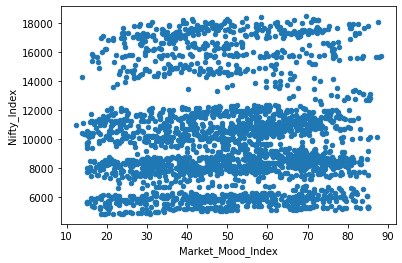

In [221]:
DF.plot(kind = 'scatter', x = 'Market_Mood_Index', y = 'Nifty_Index')

<AxesSubplot:ylabel='Frequency'>

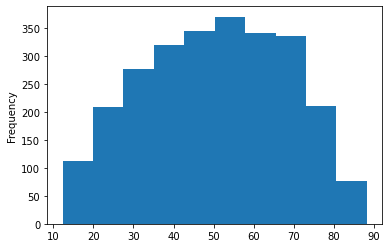

In [222]:
DF['Market_Mood_Index'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

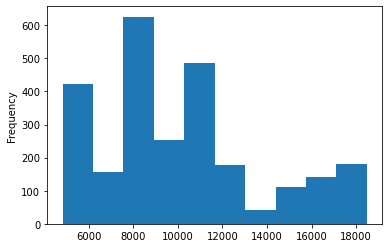

In [223]:
DF['Nifty_Index'].plot(kind = 'hist')

## Step 4: Data Preparation

### Check for NULL values

In [224]:
mask = DF["Market_Mood_Index"].isnull()
DF[mask]

,Date,Market_Mood_Index,Nifty_Index


### Normalizing the data

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
Nifty_Index_mm = MinMaxScaler().fit_transform(DF[['Nifty_Index']])
Nifty_Index_mm = pd.DataFrame(Nifty_Index_mm, columns = ['Nifty_Index'])
Nifty_Index_mm.head()

,Nifty_Index
0,0.949400
1,0.945746
2,0.939838
3,0.933969
4,0.933064


In [227]:
Nifty_Index_mm.describe()

,Nifty_Index
count,2595.000000
mean,0.387699
std,0.260172
min,0.000000
25%,0.214654
50%,0.343458
75%,0.500581
max,1.000000


<AxesSubplot:ylabel='Frequency'>

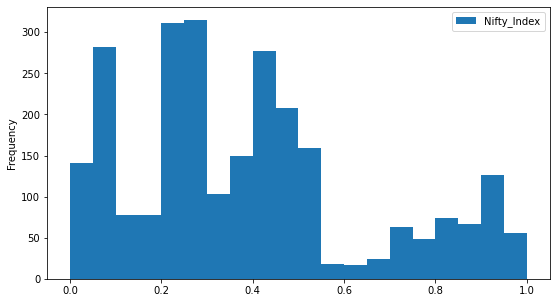

In [228]:
Nifty_Index_mm.plot(kind = 'hist', bins = 20, figsize = (9, 5))

### Sampling Data

In [229]:
response = 'Nifty_Index'
y = DF[[response]]
y.head()

,Nifty_Index
0,17786.80
1,17736.95
2,17656.35
3,17576.30
4,17563.95


In [230]:
predictors = list(DF.columns)
predictors.remove(response)
predictors.remove("Date")

x = DF[predictors]
x.head()

,Market_Mood_Index
0,51.648243
1,48.166520
2,46.348819
3,43.531565
4,40.491783


Splitting data using simple random sampling

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y) 

In [233]:
x_train.shape

(1946, 1)

In [234]:
y_train.shape

(1946, 1)

In [235]:
x_test.shape

(649, 1)

In [236]:
y_test.shape

(649, 1)

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4) 
x_test.shape

(1038, 1)

## Step 5: Modeling

In [238]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [239]:
model.intercept_

array([9977.7488681])

In [240]:
model.coef_

array([[3.05233694]])

## Step 6: Evaluation

In [241]:
model.score(x_test, y_test)

0.00025982806217350607

In [242]:
y_pred = model.predict(x_test)

In [243]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2881.015843295188